In [90]:
# https://www.kaggle.com/datasets/thomaseltonau/self-harm-and-substance-abuse-deaths-worldwide/data

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('/Users/reecewu/Desktop/DAproject/Self Harm and Substance Abuse Deaths_231126/Self Harm and Substance Abuse Deaths.csv')

df.head()

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,Intentional self-harm,0,GBR,Female,0,743552.0,United Kingdom
1,2017,Intentional self-harm,0,GBR,Male,0,782850.0,United Kingdom
2,2017,Intentional self-harm,1,GBR,Female,0,768444.0,United Kingdom
3,2017,Intentional self-harm,1,GBR,Male,0,810126.0,United Kingdom
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom


# Clean Data

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48631 entries, 0 to 48630
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    48631 non-null  int64  
 1   Cause                   48631 non-null  object 
 2   Age_Range               48631 non-null  object 
 3   ISO_Code                48631 non-null  object 
 4   Sex                     48631 non-null  object 
 5   Deaths                  48631 non-null  int64  
 6   Age_and_Sex_Population  28987 non-null  float64
 7   Country                 48631 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.0+ MB


In [94]:
df['Cause'].unique()

array(['Intentional self-harm',
       'Mental and behavioural disorders due to psychoactive substance use'],
      dtype=object)

In [95]:
df.loc[df['Cause'] == 'Intentional self-harm', 'Cause'] = 'self-harm'
df.loc[df['Cause'] == 'Mental and behavioural disorders due to psychoactive substance use', 'Cause'] = 'substance abuse'

In [96]:
df['Age_Range'].unique()

array(['0', '1', '10-14', '15-19', '2', '20-24', '25-29', '3', '30-34',
       '35-39', '4', '40-44', '45-49', '5-9', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+', 'All',
       'Unknown', '1-4', '85+', '15-24', '25-34', '35-44', '45-54',
       '5-14', '55-64', '65-74', '75+'], dtype=object)

In [97]:
delete_age = ['0', '1', '2', '3', '4', 'All', 'Unknown', '85+', '15-24', '25-34', 
              '35-44', '45-54','5-14', '55-64', '65-74', '75+']

df = df[~df['Age_Range'].isin(delete_age)].reset_index(drop = True)

df

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom
1,2017,self-harm,10-14,GBR,Male,16,3826458.0,United Kingdom
2,2017,self-harm,15-19,GBR,Female,104,3605202.0,United Kingdom
3,2017,self-harm,15-19,GBR,Male,208,3803268.0,United Kingdom
4,2017,self-harm,20-24,GBR,Female,136,4097544.0,United Kingdom
...,...,...,...,...,...,...,...,...
35080,2017,substance abuse,75-79,VIR,All,0,NaN,Virgin Islands (USA)
35081,2017,substance abuse,80-84,VIR,All,1,NaN,Virgin Islands (USA)
35082,2017,substance abuse,85-89,VIR,All,0,NaN,Virgin Islands (USA)
35083,2017,substance abuse,90-94,VIR,All,0,NaN,Virgin Islands (USA)


In [98]:
df['ISO_Code'].unique()

array(['GBR', 'EGY', 'LBY', 'MUS', 'SYC', 'ZAF', 'TUN', 'AIA', 'ATG',
       'ARG', 'ABW', 'BMU', 'BRA', 'CAN', 'CHL', 'COL', 'CRI', 'CUB',
       'DMA', 'DOM', 'ECU', 'SLV', 'GRD', 'GTM', 'GUY', 'MEX', 'NIC',
       'PAN', 'PRY', 'PER', 'PRI', 'LCA', 'VCT', 'TCA', 'USA', 'VIR',
       'URY', 'BRN', 'CYP', 'HKG', 'ISR', 'JPN', 'JOR', 'KWT', 'LBN',
       'MYS', 'MDV', 'MNG', 'PSE', 'OMN', 'PHL', 'QAT', 'KOR', 'SGP',
       'THA', 'TUR', 'ARE', 'ARM', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR',
       'HRV', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'GEO', 'DEU', 'GRC',
       'HUN', 'ISL', 'IRL', 'ITA', 'KAZ', 'KGZ', 'LVA', 'LTU', 'LUX',
       'MKD', 'MLT', 'MNE', 'NLD', 'POL', 'PRT', 'MDA', 'ROU', 'RUS',
       'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TJK', 'UKR', 'UZB',
       'AUS', 'SLB'], dtype=object)

In [99]:
df['Sex'].unique()

array(['Female', 'Male', 'Unspecified', 'All'], dtype=object)

In [100]:
df = df[~df['Sex'].isin(['All'])].reset_index(drop = True)

df

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom
1,2017,self-harm,10-14,GBR,Male,16,3826458.0,United Kingdom
2,2017,self-harm,15-19,GBR,Female,104,3605202.0,United Kingdom
3,2017,self-harm,15-19,GBR,Male,208,3803268.0,United Kingdom
4,2017,self-harm,20-24,GBR,Female,136,4097544.0,United Kingdom
...,...,...,...,...,...,...,...,...
23057,2017,self-harm,75-79,SLB,Male,0,NaN,Solomon Islands
23058,2017,self-harm,80-84,SLB,Male,0,NaN,Solomon Islands
23059,2017,self-harm,85-89,SLB,Male,0,NaN,Solomon Islands
23060,2017,self-harm,90-94,SLB,Male,0,NaN,Solomon Islands


# Visualization

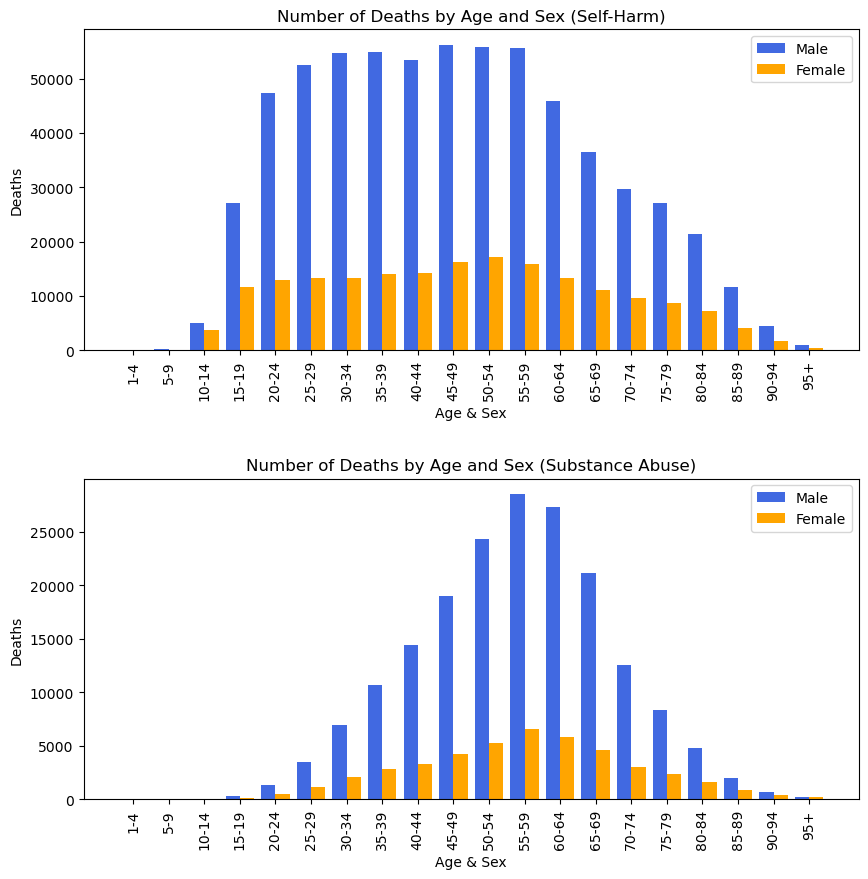

In [101]:
selfharm_data = df[df['Cause'] == 'self-harm']
AgeSex_vs_selfharm = selfharm_data.groupby(['Age_Range', 'Sex'])['Deaths'].sum().reset_index()
AgeSex_vs_selfharm['Age_Sort'] = AgeSex_vs_selfharm['Age_Range'].str.replace('\+', '', regex = True).str.split('-').str[0]
AgeSex_vs_selfharm['Age_Sort'] = AgeSex_vs_selfharm['Age_Sort'].astype(int)
AgeSex_vs_selfharm.sort_values(by = 'Age_Sort', inplace = True)
AgeSex_vs_selfharm.drop(columns = 'Age_Sort', inplace = True)

substance_abuse_data = df[df['Cause'] == 'substance abuse']
AgeSex_vs_substance_abuse = substance_abuse_data.groupby(['Age_Range', 'Sex'])['Deaths'].sum().reset_index()
AgeSex_vs_substance_abuse['Age_Sort'] = AgeSex_vs_substance_abuse['Age_Range'].str.replace('\+', '', regex = True).str.split('-').str[0]
AgeSex_vs_substance_abuse['Age_Sort'] = AgeSex_vs_substance_abuse['Age_Sort'].astype(int)
AgeSex_vs_substance_abuse.sort_values(by = 'Age_Sort', inplace = True)
AgeSex_vs_substance_abuse.drop(columns = 'Age_Sort', inplace = True)

age_ranges = AgeSex_vs_selfharm['Age_Range'].unique()
x = range(len(age_ranges))

bar_width = 0.4

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(hspace = 0.4)

# 1
axs[0].bar(x, AgeSex_vs_selfharm[AgeSex_vs_selfharm['Sex'] == 'Male']['Deaths'], width = bar_width, label = 'Male', color = 'royalblue')
axs[0].bar([i + bar_width for i in x], AgeSex_vs_selfharm[AgeSex_vs_selfharm['Sex'] == 'Female']['Deaths'], width = bar_width, label = 'Female', color = 'orange')

axs[0].set_xlabel('Age & Sex')
axs[0].set_ylabel('Deaths')
axs[0].set_title('Number of Deaths by Age and Sex (Self-Harm)')

axs[0].set_xticks([i + bar_width/2 for i in x], age_ranges, rotation = 90)
axs[0].legend()
# 2
axs[1].bar(x, AgeSex_vs_substance_abuse[AgeSex_vs_substance_abuse['Sex'] == 'Male']['Deaths'], width = bar_width, label = 'Male', color = 'royalblue')
axs[1].bar([i + bar_width for i in x], AgeSex_vs_substance_abuse[AgeSex_vs_substance_abuse['Sex'] == 'Female']['Deaths'], width = bar_width, label = 'Female', color = 'orange')

axs[1].set_xlabel('Age & Sex')
axs[1].set_ylabel('Deaths')
axs[1].set_title('Number of Deaths by Age and Sex (Substance Abuse)')

axs[1].set_xticks([i + bar_width/2 for i in x], age_ranges, rotation = 90)
axs[1].legend()

plt.show()


In [102]:
import plotly.express as px

geo_data = df[['ISO_Code', 'Country', 'Deaths']]
geo_data = geo_data.groupby(['ISO_Code', 'Country'])['Deaths'].sum().reset_index()

fig = px.choropleth(
    geo_data,
    locations = "ISO_Code",
    color = "Deaths",
    title = "Worldwide Deaths by Country (ISO Code)",
    color_continuous_scale = ["royalblue", 'orange'],
    projection = "natural earth"
)

fig.show()

![Self-Harm and Substance Abuse Deaths](https://github.com/Reece-Wu/PythonCode/blob/main/images/Self-Harm%20and%20Substance%20Abuse%20Deaths.png?raw=true)

# Machine Learning

In [103]:
# one-hot encoding

def convert_dummy(df, feature):
    pos = pd.get_dummies(df[feature], prefix = feature)
    mode = df[feature].value_counts().index[0]
    biggest = feature + '_' + mode
    pos.drop([biggest], axis = 1, inplace = True)
    df.drop([feature], axis = 1, inplace = True)
    df = df.join(pos)
    return df

In [104]:
# Evaluate indicators

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_indicators(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    results = [name, mse, rmse, mae, r_squared]
    
    return results

EItable = pd.DataFrame(columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R-squared'])

In [105]:
ml_df = df.drop(columns = ['Year', 'ISO_Code', 'Age_and_Sex_Population'])

ml_df.head()

,Cause,Age_Range,Sex,Deaths,Country
0,self-harm,10-14,Female,16,United Kingdom
1,self-harm,10-14,Male,16,United Kingdom
2,self-harm,15-19,Female,104,United Kingdom
3,self-harm,15-19,Male,208,United Kingdom
4,self-harm,20-24,Female,136,United Kingdom


In [106]:
# Categorical Features: Cause

ml_df = convert_dummy(ml_df, 'Cause')
ml_df.head()

,Age_Range,Sex,Deaths,Country,Cause_substance abuse
0,10-14,Female,16,United Kingdom,0
1,10-14,Male,16,United Kingdom,0
2,15-19,Female,104,United Kingdom,0
3,15-19,Male,208,United Kingdom,0
4,20-24,Female,136,United Kingdom,0


In [107]:
# Categorical Features: Age_Range

Age_Range_mapping = {
    '1-4': 0,
    '5-9': 1,
    '10-14': 2,
    '15-19': 3,
    '20-24': 4,
    '25-29': 5,
    '30-34': 6,
    '35-39': 7,
    '40-44': 8,
    '45-49': 9,
    '50-54': 10,
    '55-59': 11,
    '60-64': 12,
    '65-69': 13,
    '70-74': 14,
    '75-79': 15,
    '80-84': 16,
    '85-89': 17,
    '90-94': 18,
    '95+': 19
}

ml_df['Age_Range_encoded'] = df['Age_Range'].map(Age_Range_mapping)
ml_df.drop(['Age_Range'], axis = 1, inplace = True)

ml_df.head()

,Sex,Deaths,Country,Cause_substance abuse,Age_Range_encoded
0,Female,16,United Kingdom,0,2
1,Male,16,United Kingdom,0,2
2,Female,104,United Kingdom,0,3
3,Male,208,United Kingdom,0,3
4,Female,136,United Kingdom,0,4


In [108]:
# Categorical Features: Sex

ml_df = convert_dummy(ml_df, 'Sex')
ml_df.head()

,Deaths,Country,Cause_substance abuse,Age_Range_encoded,Sex_Female,Sex_Unspecified
0,16,United Kingdom,0,2,1,0
1,16,United Kingdom,0,2,0,0
2,104,United Kingdom,0,3,1,0
3,208,United Kingdom,0,3,0,0
4,136,United Kingdom,0,4,1,0


In [109]:
# Categorical Features: Country

ml_df = convert_dummy(ml_df, 'Country')
ml_df.head()

,Deaths,Cause_substance abuse,Age_Range_encoded,Sex_Female,Sex_Unspecified,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,...,Country_Tunisia,Country_Turkey,Country_Turks and Caicos Islands,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Virgin Islands (USA)
0,16,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,104,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,208,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,136,0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [110]:
# Feature column X and target column Y

y = ml_df['Deaths']
X = ml_df.drop(['Deaths'], axis = 1)

In [111]:
# Create test set and training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
np.random.seed(42)

In [112]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

results = get_indicators('Linear Regression', y_test, y_pred)

EItable.loc[len(EItable)] = results
EItable

,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression,24392.016644,156.179437,57.994486,0.359656


## Decision Tree

In [114]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

results = get_indicators('Decision Tree', y_test, y_pred)

EItable.loc[len(EItable)] = results
EItable

,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression,24392.016644,156.179437,57.994486,0.359656
1,Decision Tree,3236.958043,56.894271,11.792163,0.915023


## Random Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

results = get_indicators('Random Forest', y_test, y_pred)

EItable.loc[len(EItable)] = results
EItable

,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression,24392.016644,156.179437,57.994486,0.359656
1,Decision Tree,3236.958043,56.894271,11.792163,0.915023
2,Random Forest,4476.104164,66.903693,24.752163,0.882493


## Gradient Boosting

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

results = get_indicators('Gradient Boosting', y_test, y_pred)

EItable.loc[len(EItable)] = results
EItable

,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression,24392.016644,156.179437,57.994486,0.359656
1,Decision Tree,3236.958043,56.894271,11.792163,0.915023
2,Random Forest,4476.104164,66.903693,24.752163,0.882493
3,Gradient Boosting,9539.528186,97.670508,38.278393,0.749567


## SVR

In [117]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

results = get_indicators('SVR', y_test, y_pred)

EItable.loc[len(EItable)] = results
EItable

,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression,24392.016644,156.179437,57.994486,0.359656
1,Decision Tree,3236.958043,56.894271,11.792163,0.915023
2,Random Forest,4476.104164,66.903693,24.752163,0.882493
3,Gradient Boosting,9539.528186,97.670508,38.278393,0.749567
4,SVR,35748.722436,189.073326,41.686402,0.061518


## KNN

In [118]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

results = get_indicators('KNN', y_test, y_pred)

EItable.loc[len(EItable)] = results
EItable

,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression,24392.016644,156.179437,57.994486,0.359656
1,Decision Tree,3236.958043,56.894271,11.792163,0.915023
2,Random Forest,4476.104164,66.903693,24.752163,0.882493
3,Gradient Boosting,9539.528186,97.670508,38.278393,0.749567
4,SVR,35748.722436,189.073326,41.686402,0.061518
5,KNN,1022.174507,31.971464,7.003468,0.973166


## Model Optimization: Decision Tree

In [119]:
from sklearn.model_selection import GridSearchCV

model_optree = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10 ,15],
    'min_samples_split': [2 ,5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model_optree, param_grid, cv = 5, scoring ='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_model_optree = grid_search.best_estimator_

print("Best Parameters for Decision Tree:", grid_search.best_params_)

y_pred_optree = best_model_optree.predict(X_test_scaled)

results = get_indicators('Decision Tree_op', y_test, y_pred_optree)

EItable.loc[len(EItable)] = results
EItable

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression,24392.016644,156.179437,57.994486,0.359656
1,Decision Tree,3236.958043,56.894271,11.792163,0.915023
2,Random Forest,4476.104164,66.903693,24.752163,0.882493
3,Gradient Boosting,9539.528186,97.670508,38.278393,0.749567
4,SVR,35748.722436,189.073326,41.686402,0.061518
5,KNN,1022.174507,31.971464,7.003468,0.973166
6,Decision Tree_op,1562.253257,39.525350,9.948993,0.958987


In [120]:
feature_importances = best_model_optree.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Age_Range_encoded: 0.31483888074858035
Country_United States of America: 0.2501803052926553
Cause_substance abuse: 0.12923401637982015
Sex_Female: 0.11808404712360947
Country_Russian Federation: 0.02301035766506161
Country_Japan: 0.018898305897378575
Country_Germany: 0.013522476449165325
Country_Republic of Korea: 0.011128491773417487
Country_Belarus: 0.009456537438186212
Country_Tajikistan: 0.008903435804628292
Sex_Unspecified: 0.008258760693548079
Country_United Kingdom: 0.007007624039066909
Country_Malta: 0.0068458271826475885
Country_Ukraine: 0.004594241067052684
Country_Poland: 0.00446288566154128
Country_Ireland: 0.0042730799232825
Country_Mexico: 0.003999180536453221
Country_Virgin Islands (USA): 0.0038843129952808204
Country_Puerto Rico: 0.003829735685263278
Country_Thailand: 0.0033314061342814547
Country_France: 0.0032982706518110156
Country_Bermuda: 0.0027309405300014232
Country_Hong Kong SAR: 0.002526601656870517
Country_Libyan Arab Jamahiriya: 0.0023385096945750276
Country_

## Model Optimization: KNN

In [121]:
from sklearn.pipeline import make_pipeline

model_opknn = make_pipeline(KNeighborsRegressor())

param_grid = {
    'kneighborsregressor__n_neighbors': [3, 5, 7, 10],
    'kneighborsregressor__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(model_opknn, param_grid, cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_model_opknn = grid_search.best_estimator_

print("Best Parameters for Random KNN:", grid_search.best_params_)

y_pred_opknn = best_model_opknn.predict(X_test_scaled)

results = get_indicators('KNN_op', y_test, y_pred_opknn)

EItable.loc[len(EItable)] = results
EItable

Best Parameters for Random KNN: {'kneighborsregressor__n_neighbors': 5, 'kneighborsregressor__weights': 'distance'}


,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression,24392.016644,156.179437,57.994486,0.359656
1,Decision Tree,3236.958043,56.894271,11.792163,0.915023
2,Random Forest,4476.104164,66.903693,24.752163,0.882493
3,Gradient Boosting,9539.528186,97.670508,38.278393,0.749567
4,SVR,35748.722436,189.073326,41.686402,0.061518
5,KNN,1022.174507,31.971464,7.003468,0.973166
6,Decision Tree_op,1562.253257,39.525350,9.948993,0.958987
7,KNN_op,1001.104453,31.640235,6.742046,0.973719
